In [2]:
import pandas as pd
import numpy as np


In [91]:
data = pd.read_csv('master.csv')
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
df['age'].unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [19]:
df.describe()
df.isnull().any() #check columns having null



country               False
year                  False
sex                   False
age                   False
suicides_no           False
population            False
suicides/100k pop     False
country-year          False
HDI for year           True
 gdp_for_year ($)     False
gdp_per_capita ($)    False
generation            False
dtype: bool

In [20]:
df.isnull().values.any()  #check if values are null anywhere

True

In [23]:
df.isnull().sum()   #total null values

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [25]:
df.drop(['HDI for year','country-year'], axis = 1)

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,"2,156,624,900",796,Generation X


In [95]:

#Now start analysis, min year and max year will find them
min_year=min(data.year)
max_year=max(data.year)
print('Min Year :',min_year)
print('Max Year :',max_year)

#1985 min year,2016 max year.

data_country=data[(data['year']==min_year)]

country_1985=data[(data['year']==min_year)].country.unique()
country_1985_male=[]
country_1985_female=[]

for country in country_1985:
    country_1985_male.append(len(data_country[(data_country['country']==country)&(data_country['sex']=='male')]))
    country_1985_female.append(len(data_country[(data_country['country']==country)&(data_country['sex']=='female')])) 

Min Year : 1985
Max Year : 2016


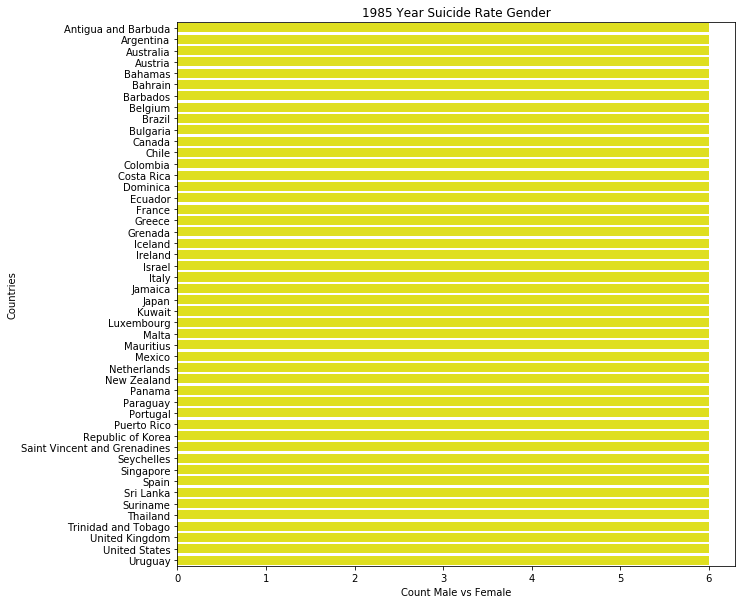

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
sns.barplot(y=country_1985,x=country_1985_male,color='red')
sns.barplot(y=country_1985,x=country_1985_female,color='yellow')
plt.ylabel('Countries')
plt.xlabel('Count Male vs Female')
plt.title('1985 Year Suicide Rate Gender')
plt.show()